# Building a Handwritten Digits Classifier

In this project, we will build a handwritten digits classifier.  We will train a couple of neural network models after reviewing the dataset.

In [1]:
# imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style('white')
from sklearn.datasets import load_digits
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.neural_network import MLPClassifier
import warnings
warnings.filterwarnings('ignore')

In [2]:
# read in the data
digits = load_digits()

Digits is a dictionary.  Let's look at the different elements contained within it.

In [3]:
# print the description of the data
print(digits['DESCR'])

.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 5620
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
http://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each bloc

In [4]:
# create a dataframe of the data
features = pd.DataFrame(digits.data)
features.shape

(1797, 64)

In [5]:
features.head()

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0


In [6]:
# create a series of the labels
labels = pd.Series(digits.target)
labels.shape

(1797,)

In [7]:
labels.head()

0    0
1    1
2    2
3    3
4    4
dtype: int32

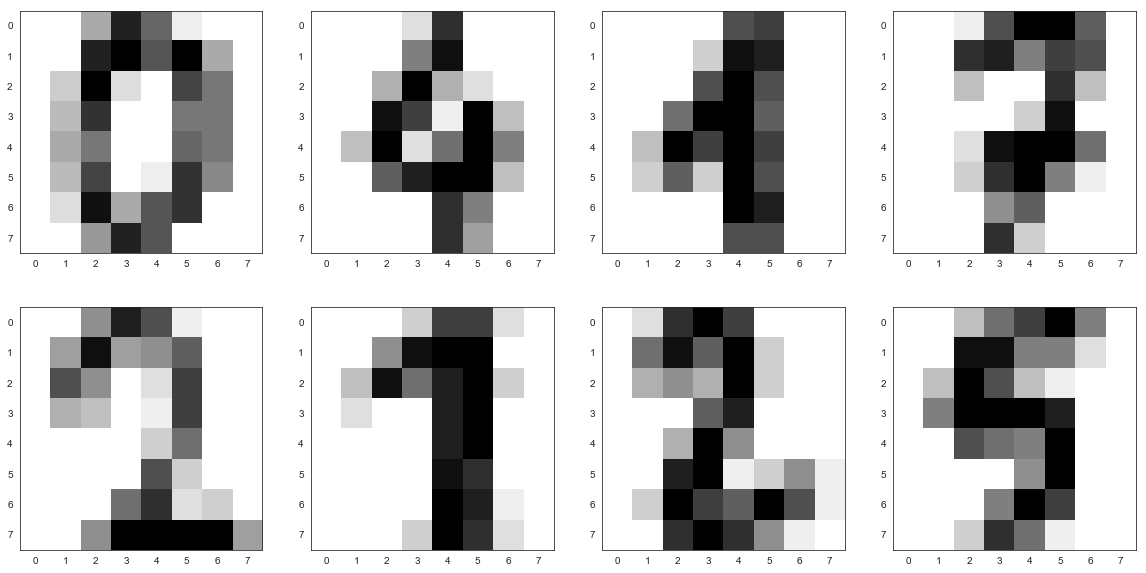

In [8]:
# create visualizations of several sample rows
fig = plt.figure(figsize=(20,10))
for i in range(0,8):
    ax = fig.add_subplot(2,4,i+1)
    if i < 4:
        image = features.iloc[i * 100]
    else:
        image = features.iloc[i * 100 + 1000]
    image = image.values
    image = image.reshape(8,8)
    plt.imshow(image, cmap='gray_r')
plt.show()

## Initial Model using k-Nearest Neighbors

Let's first create a model using k-nearest neighbors.  We can evaluate the model based on accuracy.

In [9]:
# define function for knn model with k variables
def knn_model(k):
    kf = KFold(5, shuffle=True, random_state=1)
    knn = KNeighborsClassifier(n_neighbors=k)
    accuracy = cross_val_score(knn, features, labels, scoring='accuracy', cv=kf)
    avg_accuracy = np.mean(accuracy)
    return avg_accuracy

In [10]:
# review results as we vary k
accuracies = []
for k in range(1, 11):
    accuracies.append(knn_model(k))

In [11]:
print(accuracies)

[0.9872005571030641, 0.9844181367997524, 0.9877592076756423, 0.9844212318167751, 0.9844181367997524, 0.9827468276075517, 0.9849721448467965, 0.9810755184153512, 0.982189724543485, 0.9794073042401733]


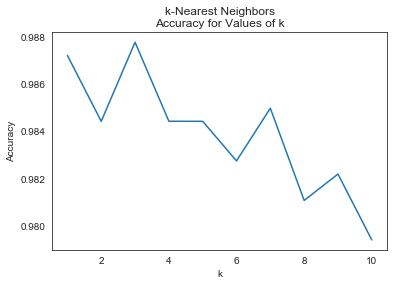

In [12]:
plt.plot(range(1, 11), accuracies)
plt.title('k-Nearest Neighbors\nAccuracy for Values of k')
plt.xlabel('k')
plt.ylabel('Accuracy')
plt.show()

## Neural Networks

Now let's try using a neural network instead of k-Nearest Neighbors and see if we can do any better.  We can begin by looking at a neural network with one hidden layer.  We will use a range of neurons in that hidden layer and look at the model's performance, again using accuracy as the measure.

In [13]:
# define function for neural network with one hidden layer
def nn_one_model(n):
    kf = KFold(5, shuffle=True, random_state=1)
    mlp = MLPClassifier(hidden_layer_sizes=(n,), max_iter=500)
    accuracy = cross_val_score(mlp, features, labels, scoring='accuracy', cv=kf)
    avg_accuracy = np.mean(accuracy)
    return avg_accuracy

In [14]:
# review results as we vary the number of neurons
neurons = [8, 16, 32, 64, 128, 256]
accuracy_nn_one = []
for n in neurons:
    accuracy_nn_one.append(nn_one_model(n))

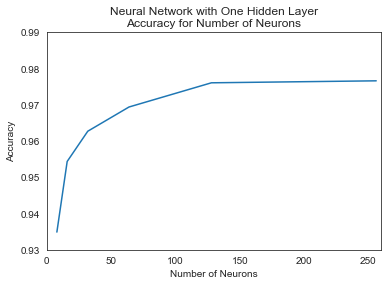

In [15]:
plt.plot(neurons, accuracy_nn_one)
plt.title('Neural Network with One Hidden Layer\nAccuracy for Number of Neurons')
plt.xlabel('Number of Neurons')
plt.ylabel('Accuracy')
plt.ylim(0.93, 0.99)
plt.xlim(0,260)
plt.show()

With one hidden layer, we do not really do better than the k-Nearest Neighbors model.  If we add layers, can we improve?

In [16]:
# update our function for two hidden layers
def nn_two_model(n):
    kf = KFold(5, shuffle=True, random_state=1)
    mlp = MLPClassifier(hidden_layer_sizes=(n,n), max_iter=500)
    accuracy = cross_val_score(mlp, features, labels, scoring='accuracy', cv=kf)
    avg_accuracy = np.mean(accuracy)
    return avg_accuracy

In [17]:
neurons_two = [16, 32, 64, 128, 256]
accuracy_nn_two = []
for n in neurons_two:
    accuracy_nn_two.append(nn_two_model(n))

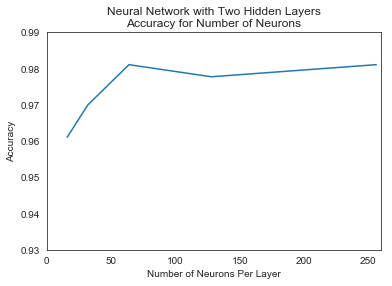

In [18]:
plt.plot(neurons_two, accuracy_nn_two)
plt.title('Neural Network with Two Hidden Layers\nAccuracy for Number of Neurons')
plt.xlabel('Number of Neurons Per Layer')
plt.ylabel('Accuracy')
plt.ylim(0.93, 0.99)
plt.xlim(0,260)
plt.show()

This improved over having only one layer.  Also, as the number of neurons increases, the model performs better.  Can we improve by adding another layer again?

In [19]:
# update our function for three hidden layers
def nn_three_model(n):
    kf = KFold(5, shuffle=True, random_state=1)
    mlp = MLPClassifier(hidden_layer_sizes=(n,n,n), max_iter=500)
    accuracy = cross_val_score(mlp, features, labels, scoring='accuracy', cv=kf)
    avg_accuracy = np.mean(accuracy)
    return avg_accuracy

In [20]:
neurons_three = [32, 64, 128, 256]
accuracy_nn_three = []
for n in neurons_three:
    accuracy_nn_three.append(nn_three_model(n))

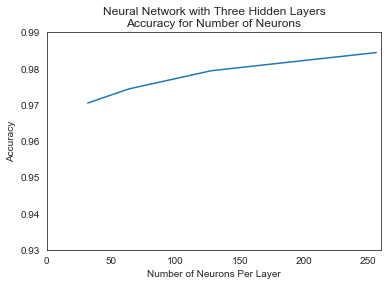

In [21]:
plt.plot(neurons_three, accuracy_nn_three)
plt.title('Neural Network with Three Hidden Layers\nAccuracy for Number of Neurons')
plt.xlabel('Number of Neurons Per Layer')
plt.ylabel('Accuracy')
plt.ylim(0.93, 0.99)
plt.xlim(0,260)
plt.show()

In [22]:
print(accuracy_nn_three)

[0.9705091303002167, 0.9744042092231506, 0.979421231816775, 0.9844243268337977]


Again, this is an improvement.  Having more layers and more neurons in those layers improves our models.